In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [49]:
data = pd.read_csv('full_data_clustered_ssim_V4.csv').replace(np.nan,'None')
data = data.replace(np.nan,'None')
data = data.drop(columns=['cluster','cluster_2'])
print(data.shape)

df = data.copy()
df = df[df['Authentication']!='Single system']
df = df[df['Access']!='Unknown']
df = df.reset_index().drop(columns=['level_0'])
# df.to_csv('full_data_clustered_ssim_V5.csv',index=False)
data = df 
print(df.shape)

(61698, 22)
(52634, 22)


In [53]:
pd.read_csv('full_data_clustered_ssim_V5.csv')

,CVE ID,Publish Date,Update Date,Number Of Related Vulnerabilities,index,CWE ID,Vulnerability Type(s),Score,Access,Complexity,...,Integ.,Avail,CVE Summary,Vulnerability Name,Vulnerability Description,CLEAN TEXT,CI SCORE,CI SCORE GLOVE,CI SCORE GLOVE 2,CI SCORE GLOVE 50
0,CVE-2019-1020019,2019-07-29,2019-07-31,22413.0,1,79,XSS,4.3,Remote,Medium,...,Partial,NaN,invenio-previewer before 1.0.0a12 allows XSS.,Failure to Preserve Web Page Structure ('Cross...,The software does not sufficiently valida...,failure preserve web page structure cross site...,0.666677,0.698982,0.620250,0.764294
1,CVE-2019-1020018,2019-07-29,2022-04-18,3011.0,2,287,Unknown,7.5,Remote,Low,...,Partial,Partial,Discourse before 2.3.0 and 2.4.x before 2.4.0....,Improper Authentication,When an actor claims to have a given iden...,improper authentication actor claim give ident...,0.625171,0.632779,0.567375,0.694202
2,CVE-2019-1020016,2019-07-29,2019-08-01,754.0,3,601,Unknown,5.8,Remote,Medium,...,Partial,NaN,ASH-AIO before 2.0.0.3 allows an open redirect.,URL Redirection to Untrusted Site ('Open Redir...,A web application accepts a user-controll...,url redirection untrusted site open redirect w...,0.636100,0.627934,0.573071,0.692237
3,CVE-2019-1020015,2019-07-29,2021-07-21,9380.0,4,20,Unknown,5.0,Remote,Low,...,Partial,NaN,graphql-engine (aka Hasura GraphQL Engine) bef...,Improper Input Validation,The product does not validate or incorrec...,improper input validation product validate inc...,0.719175,0.676609,0.614739,0.752815
4,CVE-2019-1020014,2019-07-29,2022-10-06,394.0,5,415,Unknown,2.1,Local,Low,...,NaN,NaN,docker-credential-helpers before 0.6.3 has a d...,Double Free,The product calls free() twice on the sam...,double free product call free twice memory add...,0.707726,0.695226,0.627228,0.771792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52629,CVE-2008-10001,2022-03-28,2022-04-08,22413.0,61694,79,XSS,4.3,Remote,Medium,...,Partial,NaN,** UNSUPPORTED WHEN ASSIGNED ** A vulnerabilit...,Failure to Preserve Web Page Structure ('Cross...,The software does not sufficiently valida...,failure preserve web page structure cross site...,0.706891,0.713690,0.645094,0.778859
52630,CVE-2007-20001,2022-02-06,2022-09-01,1320.0,61695,400,DoS,5.0,Remote,Low,...,NaN,Partial,A flaw was found in StarWind iSCSI target. An ...,Uncontrolled Resource Consumption ('Resource E...,The software does not properly restrict t...,uncontrolle resource consumption resource exha...,0.789261,0.747740,0.679483,0.808397
52631,CVE-2005-10001,2022-03-28,2022-04-08,754.0,61696,601,Unknown,5.8,Remote,Medium,...,Partial,NaN,** UNSUPPORTED WHEN ASSIGNED ** A vulnerabilit...,URL Redirection to Untrusted Site ('Open Redir...,A web application accepts a user-controll...,url redirection untrusted site open redirect w...,0.696738,0.670062,0.621229,0.733526
52632,CVE-2003-5003,2022-03-28,2022-04-06,22413.0,61697,79,XSS,4.3,Remote,Medium,...,Partial,NaN,** UNSUPPORTED WHEN ASSIGNED ** A vulnerabilit...,Failure to Preserve Web Page Structure ('Cross...,The software does not sufficiently valida...,failure preserve web page structure cross site...,0.711290,0.719332,0.651999,0.787095


In [50]:
categories = ['Access','Complexity','Authentication','Conf.','Integ.','Avail']

In [51]:
data['Vulnerability Type(s)'].nunique()

134

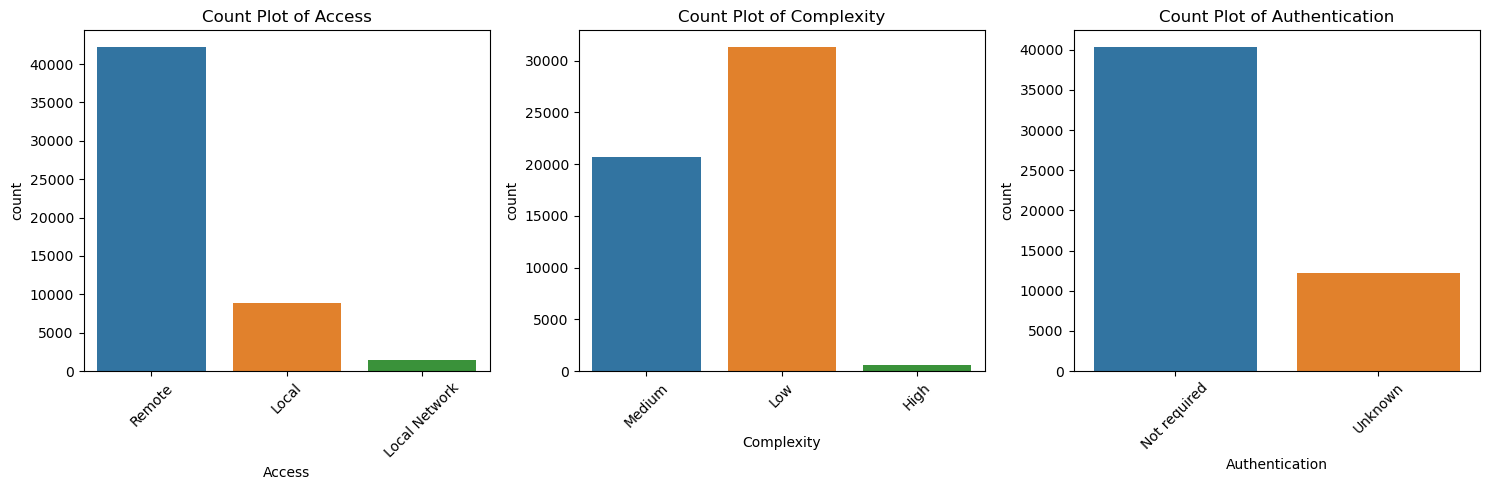

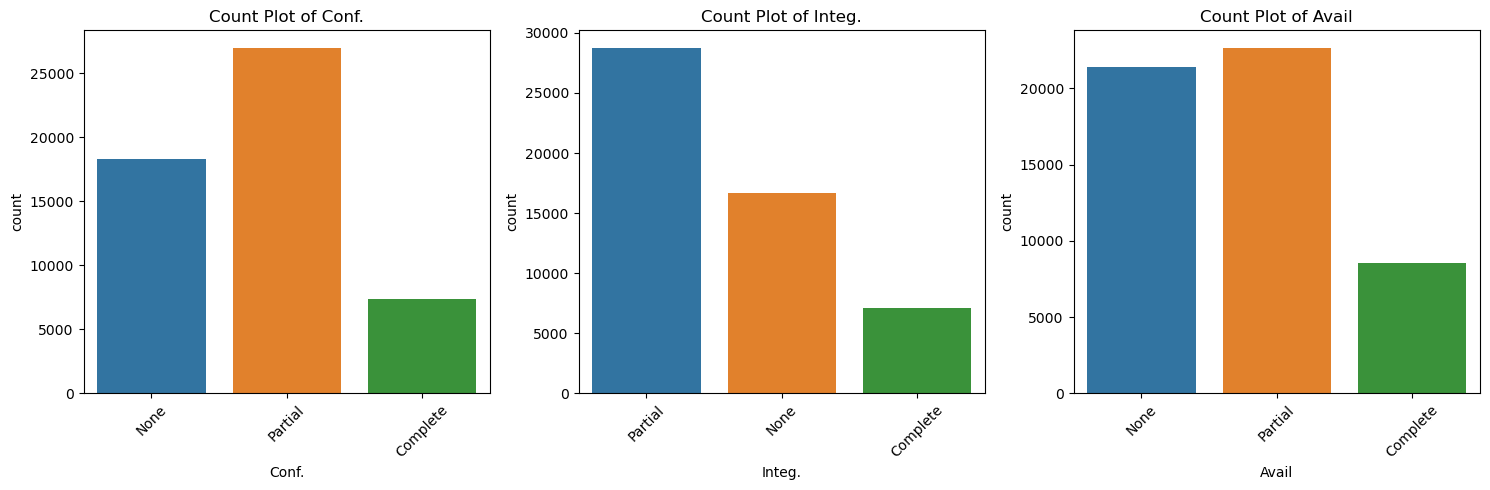

In [52]:

cols = categories


# Organize plots on two lines with three columns each
num_cols_per_line = 3
num_lines = -(-len(cols) // num_cols_per_line)  # Ceiling division

for line in range(num_lines):
    plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
    for i in range(num_cols_per_line):
        index = line * num_cols_per_line + i
        if index < len(cols):
            plt.subplot(1, num_cols_per_line, i + 1)
            sns.countplot(data=data, x=cols[index])
            plt.title(f'Count Plot of {cols[index]}')
            plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### EDA FOR ADD TO RAPPORT

In [42]:
data.head(3)

,CVE ID,CWE ID,# of Exploits,Vulnerability Type(s),Publish Date,Update Date,Score,Gained Access Level,Access,Complexity,...,Conf.,Integ.,Avail,CVE Summary,CWE Number,Name,Number Of Related Vulnerabilities,Description,Background Details,index
0,CVE-2019-1020019,79,0,XSS,2019-07-29,2019-07-31,4.3,None,Remote,Medium,...,None,Partial,None,invenio-previewer before 1.0.0a12 allows XSS.,79.0,Failure to Preserve Web Page Structure ('Cross...,22413.0,The software does not sufficiently valida...,The same origin policy states that browse...,1
1,CVE-2019-1020018,287,0,Unknown,2019-07-29,2022-04-18,7.5,None,Remote,Low,...,Partial,Partial,Partial,Discourse before 2.3.0 and 2.4.x before 2.4.0....,287.0,Improper Authentication,3011.0,When an actor claims to have a given iden...,,2
2,CVE-2019-1020016,601,0,Unknown,2019-07-29,2019-08-01,5.8,None,Remote,Medium,...,Partial,Partial,None,ASH-AIO before 2.0.0.3 allows an open redirect.,601.0,URL Redirection to Untrusted Site ('Open Redir...,754.0,A web application accepts a user-controll...,Phishing is a general term for deceptive ...,3


In [45]:
data['Number Of Related Vulnerabilities'].describe()

count    61698.000000
mean      7060.055059
std       7605.569006
min          1.000000
25%       1010.000000
50%       4891.000000
75%       9380.000000
max      22413.000000
Name: Number Of Related Vulnerabilities, dtype: float64